In [2]:
import pandas as pd
import numpy as np
from sklearn import ensemble
from sklearn import metrics
from sklearn import model_selection
from sklearn import metrics
import numpy as np
import seaborn as sns
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import validation_curve
import seaborn as sns
import time

Experiment 1: Try different sizes of input data (slowly increasing; e.g. in 500 steps) until you run into issues

In [14]:
READ_LINES = 4000
malicious_data = pd.read_csv('/rodata/exercise03/clam_mal.csv', index_col=None, nrows=READ_LINES)
benign_data = pd.read_csv('/rodata/exercise03/clam_benign.csv', index_col=None, nrows=READ_LINES)

Merge malicious and clean data (features), remove sample hashes, and split out classes

In [15]:
learn_data = malicious_data.append(benign_data, ignore_index=True)
learn_data.fillna(0, inplace=True) # fill missing entries from either set with 0
classes = learn_data['malicious']
raw_data = learn_data.copy()
del learn_data['malicious']
del learn_data['hash']

/tmp/ipykernel_94730/4192285660.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  learn_data = malicious_data.append(benign_data, ignore_index=True)


Q: How does the accuracy change?

Q: How does the learning time change?

Q: How much data is required to get to 99% and how long would the learning time be for that?

In [5]:
start = time.time()
classifier = ensemble.RandomForestClassifier()
scores = model_selection.cross_val_score(classifier, learn_data, 
                                         classes, cv = 5)
print(scores)
print("Cross Validation took %.1f seconds" % (time.time()-start))

[0.845 0.8   0.865 0.795 0.87 ]
Cross Validation took 9.7 seconds


Let's get some statistical numbers for the accuracy (mean, standard deviation)

In [7]:
print("Accuracy: %.3f (+/- %.3f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.840 (+/- 0.053)


/tmp/ipykernel_94730/2416330660.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  learn_data = malicious_data.append(benign_data, ignore_index=True)
/tmp/ipykernel_94730/2416330660.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  learn_data = malicious_data.append(benign_data, ignore_index=True)
/tmp/ipykernel_94730/2416330660.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  learn_data = malicious_data.append(benign_data, ignore_index=True)
/tmp/ipykernel_94730/2416330660.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  learn_data = malicious_data.append(benign_data, ignore_index=True)
/tmp/ipykernel_94730/2416330660.py:1

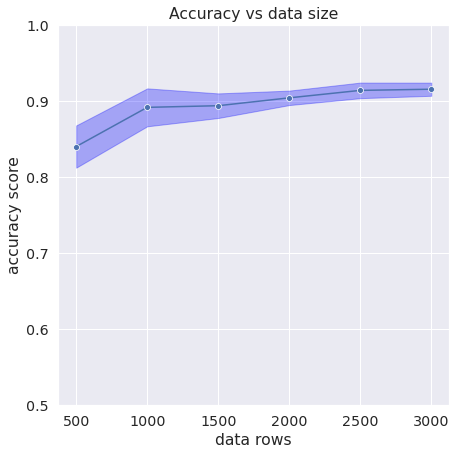

In [12]:
lines_to_read = np.arange(500,3500,500)
times_array =[]
scores_array = []
scores_std = []
for l in lines_to_read:
    start = time.time()
    classifier = ensemble.RandomForestClassifier()
    malicious_data = pd.read_csv('/rodata/exercise03/clam_mal.csv', index_col=None, nrows=l)
    benign_data = pd.read_csv('/rodata/exercise03/clam_benign.csv', index_col=None, nrows=l)
    learn_data = malicious_data.append(benign_data, ignore_index=True)
    learn_data.fillna(0, inplace=True) # fill missing entries from either set with 0
    classes = learn_data['malicious']
    del learn_data['malicious']
    del learn_data['hash']
    scores = model_selection.cross_val_score(classifier, learn_data, 
                                         classes, cv = 5)
    times_array.append(time.time() - start)
    scores_array.append(scores.mean())
    scores_std.append(scores.std())
sa = np.array( scores_array) 
sa_std = np.array( scores_std) 
times = np.array( times_array) 

fig, ax = plt.subplots(figsize=(7, 7))
sns.set(font_scale=1.3)
sns.axes_style("darkgrid")
ax = sns.lineplot(x =lines_to_read, y= sa, marker='o')

# Plot accurancy bands for training and test sets
ax.fill_between(lines_to_read, sa - sa_std,
                 sa + sa_std, color="blue",  alpha=0.3)

ax.set_title('Accuracy vs data size')
ax.set_xlabel('data rows')
ax.set_ylabel('accuracy score')
ax.set_ylim(0.5,1)
plt.show()

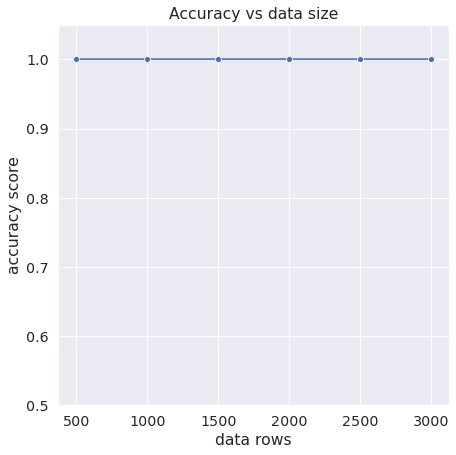

In [20]:
# this does not work!!!!
lines_to_read = np.arange(500,3500,500)
times_array =[]
scores_array = []
scores_std = []
for l in lines_to_read:
    start = time.time()
    classifier = ensemble.RandomForestClassifier()
    scores = model_selection.cross_val_score(classifier, learn_data.loc[0:l], 
                                         classes.loc[0:l], cv = 5)
    times_array.append(time.time() - start)
    scores_array.append(scores.mean())
    scores_std.append(scores.std())
sa = np.array( scores_array) 
sa_std = np.array( scores_std) 
times = np.array( times_array) 

fig, ax = plt.subplots(figsize=(7, 7))
sns.set(font_scale=1.3)
sns.axes_style("darkgrid")
ax = sns.lineplot(x =lines_to_read, y= sa, marker='o')

# Plot accurancy bands for training and test sets
ax.fill_between(lines_to_read, sa - sa_std,
                 sa + sa_std, color="blue",  alpha=0.3)

ax.set_title('Accuracy vs data size')
ax.set_xlabel('data rows')
ax.set_ylabel('accuracy score')
ax.set_ylim(0.5,1.05)
plt.show()

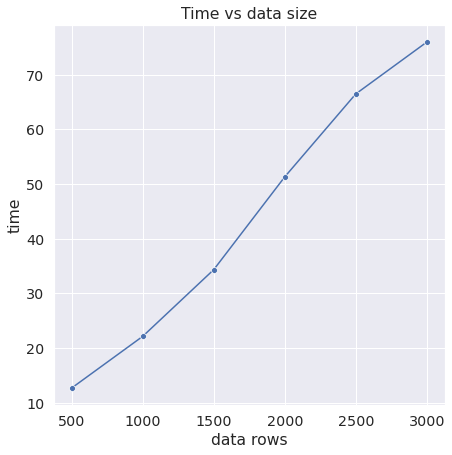

In [13]:
fig, ax = plt.subplots(figsize=(7, 7))
sns.set(font_scale=1.3)
sns.axes_style("darkgrid")
ax = sns.lineplot(x =lines_to_read, y= times, marker='o')

ax.set_title('Time vs data size')
ax.set_xlabel('data rows')
ax.set_ylabel('time')

plt.show()